# Data Preproscessing

In [ ]:
# import library yang dibutuhkan

import pandas as pd 
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs 
from matplotlib import rcParams
%matplotlib inline
import warnings                        #Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [ ]:
# load dataset

url = 'https://drive.google.com/file/d/1UJ07j4gSGHTDpw53wO3L2y4eoXesZbMN/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

#mengimpor dataset
df = pd.read_csv(dwn_url)

In [ ]:
# membagi feature berdasarkan value numerik dan kategori 

cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
nums = ['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']  

## Handle Missing Values

In [ ]:
# melihat jumlah missing value disetiap feature

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Tidak ada nilai yang kosong pada kolom**, sehingga tidak dilakukan handling missing value.

## Handle Duplicated Data

In [ ]:
# melihat jumlah duplikat

df.duplicated().sum()

125

In [ ]:
df[df.duplicated(keep=False) == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [ ]:
print(f'Jumlah row duplicated SEBELUM dihapus {df.duplicated().sum()}')

# menghapus duplikat

df.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated SEBELUM dihapus 125
Jumlah row duplicated SETELAH dihapus 0


In [ ]:
# inisiasi update datadrame

df = df.drop_duplicates().reset_index(drop = True)

## Handle Outliers

In [ ]:
#Cek outlier

from scipy import stats
filtered_entries = np.array([True] * len(df))

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in nums:
    zscore = abs(stats.zscore(df[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df1 = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')
print(f'Prsentase outlier: {round((len(df)-len(df1))/len(df)*100, 2)}%')


Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Prsentase outlier: 17.9%


Presentase outlier dalam data 17.90%, nilai tersebut cukup besar, maka outlier tidak dihilangkan. Tidak dilakukan handle juga karena outlier ini bukan dari kesalahan dalam pengambilan data.

## Feature Transformation

Transformasi feature tidak menggunakan log karena data memiliki banyak value dengan nilai 0. PowerTransformer Yeo-Johnson dipilih untuk membuat distribusi lebih mendekati normal (Guassian) dan mendukung value data memiliki nilai positif atau negatif.

In [ ]:
# transformasi data

from sklearn.preprocessing import PowerTransformer

for x in nums:
    pt = PowerTransformer(method='yeo-johnson')
    df[x] = pt.fit_transform(df[x].to_frame())

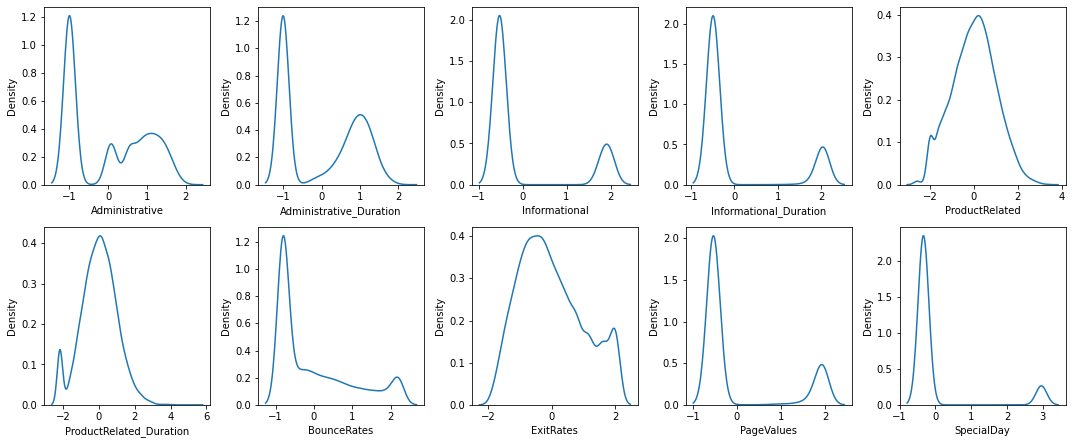

In [ ]:
# cek distribusi data

features = nums
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,Feb,2,2,1,2,Returning_Visitor,False,False
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,Feb,4,1,9,3,Returning_Visitor,False,False
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,Dec,4,6,1,1,Returning_Visitor,True,False
12201,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,Nov,3,2,1,8,Returning_Visitor,True,False
12202,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,Nov,3,2,1,13,Returning_Visitor,True,False
12203,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,Nov,2,2,3,11,Returning_Visitor,False,False


## Feature Encoding

**Handle Feature VisitorType**

In [ ]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

Value `Other` diinisiai kedalam `ReturningVisitor` (modus).

In [ ]:
df['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

**Update Feature Kategori**

In [ ]:
cats_updated = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [ ]:
for col in cats_updated:
    print(f'Value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value counts of column Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
------------------------------ 

Value counts of column OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
------------------------------ 

Value counts of column Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
------------------------------ 

Value counts of column Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
------------------------------ 

Value counts of column TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40

**Strategi Encoding**:
> OperatingSystems, Browser, Region, TrafficType sudah memiliki feature numerik <br>
> Month akan dilakukan label encoding <br>
> VisitorType, Weekend, dan Revenue akan dilakukan One Hot Encoding <br>

### Label Encoding

**Month**

In [ ]:
# membuat label peringkat berdasarkan jumlah peringkat user dari yang terbesar

month = df['Month'].value_counts().reset_index()
month_df = pd.DataFrame(month)
month_df['Month'] = (month_df['Month'].rank(ascending=False)).astype(int)
month_df

,index,Month
0,May,1
1,Nov,2
2,Mar,3
3,Dec,4
4,Oct,5
5,Sep,6
6,Aug,7
7,Jul,8
8,June,9
9,Feb,10


In [ ]:
# mapping ke dataframe (run kode 1 x)

mapping_month = month_df.set_index('index')['Month'].to_dict()

df['Month'] = df['Month'].map(mapping_month)

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,1,1,1,1,Returning_Visitor,False,False
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,10,2,2,1,2,Returning_Visitor,False,False
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,4,1,9,3,Returning_Visitor,False,False
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,10,3,2,2,4,Returning_Visitor,False,False
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,10,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,4,4,6,1,1,Returning_Visitor,True,False
12201,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,2,3,2,1,8,Returning_Visitor,True,False
12202,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,2,3,2,1,13,Returning_Visitor,True,False
12203,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,2,2,2,3,11,Returning_Visitor,False,False


### One Hot Encoding

In [ ]:
for cat in ['VisitorType', 'Weekend', 'Revenue']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
# drop kolom yang tidak dibutuhkan

df = df.drop(columns=['VisitorType', 'Weekend', 'Revenue', 'VisitorType_New_Visitor', 'Weekend_False', 'Revenue_False'])

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,1,1,1,1,1,0,0
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,10,2,2,1,2,1,0,0
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,4,1,9,3,1,0,0
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,10,3,2,2,4,1,0,0
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,10,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,4,4,6,1,1,1,1,0
12201,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,2,3,2,1,8,1,1,0
12202,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,2,3,2,1,13,1,1,0
12203,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,2,2,2,3,11,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  float64
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  float64
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  float64
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  Month                          12205 non-null  int64  
 11  OperatingSystems               12205 non-null  int64  
 12  Browser                        12205 non-null 

## Handle Class Imbalance

In [ ]:
# pembuatan binary label target
df['revenue'] = df['Revenue_True'] == 1
df['revenue'].value_counts()

False    10297
True      1908
Name: revenue, dtype: int64

In [ ]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['revenue', 'Revenue_True']]]
y = df['revenue'].values
print(X.shape)
print(y.shape)

(12205, 17)
(12205,)


## Feature Selection

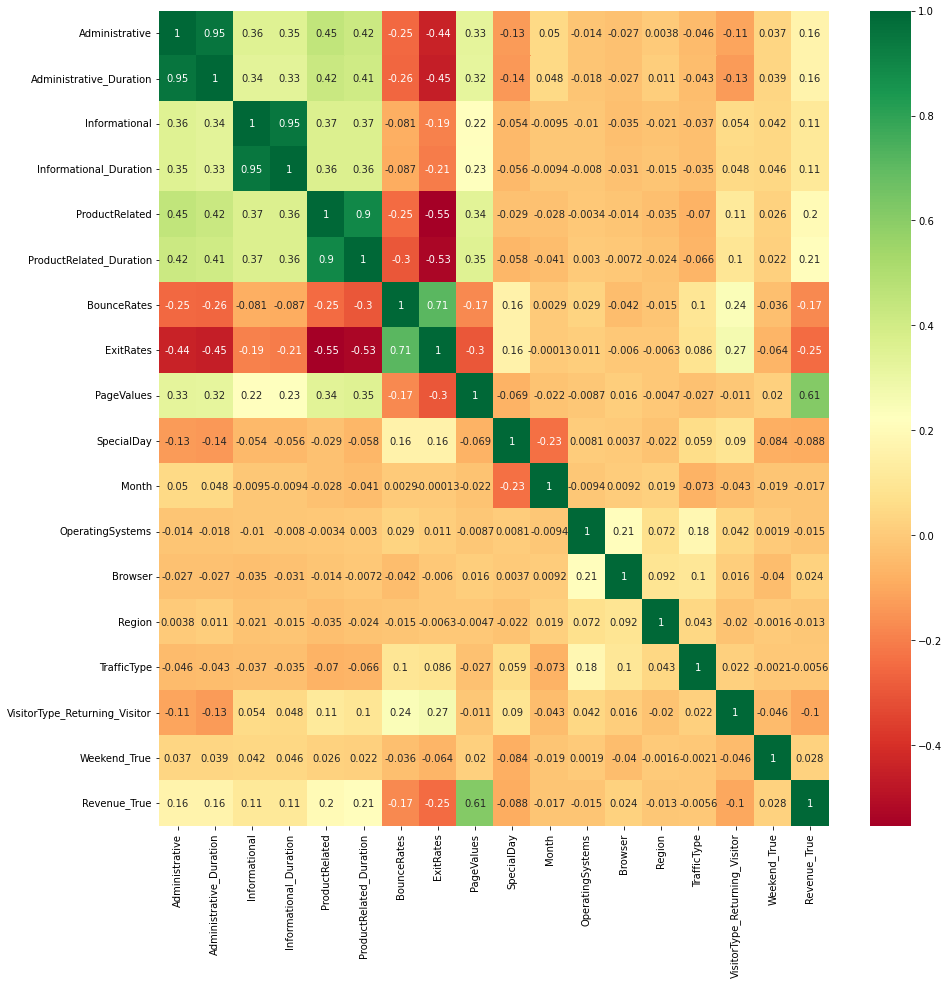

In [ ]:
corrmat = df.loc[:, df.columns != 'revenue'].corr()
top_corr_features = corrmat.index 

plt.figure(figsize=(15,15)) 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Pada tahap feature selection ini fitur yang redundant adalah :
- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>
- BounceRates - ExitRates <br>

- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>

ketiganya akan dibuat feature extraction untuk mendapatkan durasi tiap page nya, sedangkan BounceRates - ExitRates, akan dipilih salah satu, yaitu ExitRates 


## Feature Extraction

In [ ]:
# memilih feature dengn korelasi tinggi dengan Revenue

x = corrmat['Revenue_True'] 
result = x[(x>0.05)|(x<-0.05)] # korelasi lebih dari 0.1
result

Administrative                   0.164376
Administrative_Duration          0.164306
Informational                    0.110966
Informational_Duration           0.107878
ProductRelated                   0.196981
ProductRelated_Duration          0.211123
BounceRates                     -0.172585
ExitRates                       -0.249863
PageValues                       0.611599
SpecialDay                      -0.088071
VisitorType_Returning_Visitor   -0.102694
Revenue_True                     1.000000
Name: Revenue_True, dtype: float64

In [ ]:
df['Duration per Page Administrative'] = df['Administrative'] / df['Administrative_Duration']
df['Duration per Page Informational'] = df['Informational'] / df['Informational_Duration']
df['Duration per Page ProductRelated'] = df['ProductRelated'] / df['ProductRelated_Duration']

## Split Dataset

**Data yang dipilih**

In [ ]:
df_selection=df[['Duration per Page Administrative','Duration per Page Informational','Duration per Page ProductRelated','ExitRates',
              'PageValues','Revenue_True', 'VisitorType_Returning_Visitor', 'SpecialDay']]

In [ ]:
df_selection.columns

Index(['Duration per Page Administrative', 'Duration per Page Informational',
       'Duration per Page ProductRelated', 'ExitRates', 'PageValues',
       'Revenue_True', 'VisitorType_Returning_Visitor', 'SpecialDay'],
      dtype='object')

In [ ]:
X = df_selection[['Duration per Page Administrative', 'Duration per Page Informational', 'Duration per Page ProductRelated', 
                  'ExitRates', 'PageValues', 'VisitorType_Returning_Visitor', 'SpecialDay']].copy()

y = df_selection['Revenue_True'].copy()

In [ ]:
# Split terlebih dahulu sebelum di oversampling
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Data Train Didapatkan oversampling dengan SMOTE
from imblearn import under_sampling, over_sampling
X_train, y_train = over_sampling.SMOTE(0.5).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
0    7181
1    3590
Name: Revenue_True, dtype: int64


# Modeling

In [ ]:
# Fungsi Matrix Modeling

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [ ]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
eval_classification(logreg)


Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.79
Recall (Test Set): 0.79
Recall (Train Set): 0.80
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8933630373092669
roc_auc (crossval test): 0.8929059738351525


In [ ]:
#HYPERPARAMETER

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
lr = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
lr.fit(X_train, y_train)
eval_classification(lr)


Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.79
Recall (Test Set): 0.79
Recall (Train Set): 0.80
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8932846452616786
roc_auc (crossval test): 0.8928285846858335


param value: 0.0001; train: 0.8855598707359525; test: 0.8823853724367203
param value: 0.0006040404040404041; train: 0.8878505798534433; test: 0.8849968495347186
param value: 0.0011080808080808082; train: 0.888861526800645; test: 0.8859972398162386
param value: 0.0016121212121212123; train: 0.8895778631245639; test: 0.8867913216436965
param value: 0.002116161616161616; train: 0.8901363238412725; test: 0.8873103255324053
param value: 0.0026202020202020205; train: 0.8905612303280981; test: 0.8878134595400321
param value: 0.0031242424242424243; train: 0.8909184093431327; test: 0.8882278397682762
param value: 0.003628282828282828; train: 0.8912186833174358; test: 0.8885264286419613
param value: 0.004132323232323233; train: 0.8914557682587794; test: 0.8888044454475778
param value: 0.004636363636363637; train: 0.8916535200635848; test: 0.8890325015164553
param value: 0.0051404040404040416; train: 0.8918110077700399; test: 0.8892535043048521
param value: 0.005644444444444445; train: 0.89197505

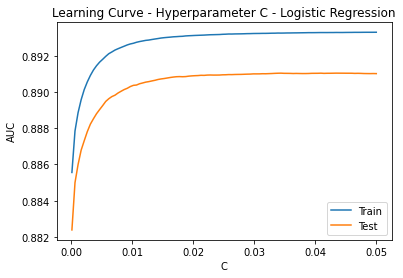

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.91
Precision (Test Set): 0.50
Precision (Train Set): 0.83
Recall (Test Set): 0.71
Recall (Train Set): 0.91
F1-Score (Test Set): 0.58
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9696310425524926
roc_auc (crossval test): 0.9224634294170164


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.90
Precision (Test Set): 0.53
Precision (Train Set): 0.85
Recall (Test Set): 0.67
Recall (Train Set): 0.86
F1-Score (Test Set): 0.60
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9660694630241666
roc_auc (crossval test): 0.9250215022654427


param value: 100; train: 0.9080441888781872; test: 0.8903855558220127
param value: 101; train: 0.9078621858440273; test: 0.8903661593006909
param value: 102; train: 0.9077547955200566; test: 0.8906762097551574
param value: 103; train: 0.9074494594409029; test: 0.8907114761575607
param value: 104; train: 0.9073031432761864; test: 0.8909010330704811
param value: 105; train: 0.9070699567374289; test: 0.8910341637395552
param value: 106; train: 0.9067913276252444; test: 0.8912005036042263
param value: 107; train: 0.9066468927791886; test: 0.8912040302444667
param value: 108; train: 0.9064912476013187; test: 0.8915340649936285
param value: 109; train: 0.9062773591251131; test: 0.8914059303982284
param value: 110; train: 0.9062091855674543; test: 0.8913835950100392
param value: 111; train: 0.9060946772646324; test: 0.8913603779617901
param value: 112; train: 0.9058548770180052; test: 0.8913118866584848
param value: 113; train: 0.905810074480824; test: 0.8911928625503722
param value: 114; tra

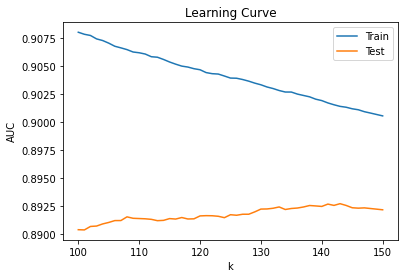

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(100, 150, 50)]
draw_learning_curve(param_values)

## Decision Tree

In [ ]:
# Fit Model Descision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 1.00
Precision (Test Set): 0.49
Precision (Train Set): 1.00
Recall (Test Set): 0.58
Recall (Train Set): 1.00
F1-Score (Test Set): 0.53
F1-Score (Test Set): 1.00
roc_auc (test-proba): 0.73
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999943331907017
roc_auc (crossval test): 0.8284166910198059


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#list hyperparameters
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2,5,10,100]
min_samples_leaf = [1,2,4,10,20,50]
max_features = ['auto','sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter)

dt = DecisionTreeClassifier(random_state=1)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.89
Precision (Test Set): 0.54
Precision (Train Set): 0.84
Recall (Test Set): 0.71
Recall (Train Set): 0.82
F1-Score (Test Set): 0.61
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9356278781025941
roc_auc (crossval test): 0.8743299674705993


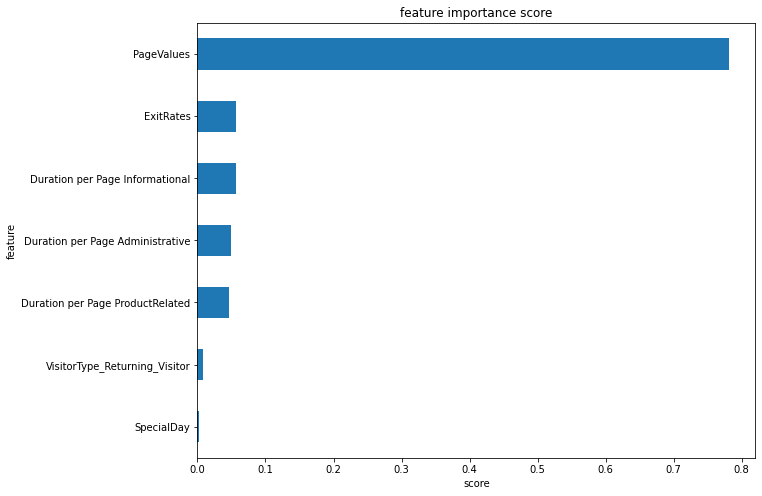

In [ ]:
# feature importance

show_feature_importance(model.best_estimator_)


## Random Forest

In [ ]:
# Fit Model Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 1.00
Precision (Test Set): 0.56
Precision (Train Set): 1.00
Recall (Test Set): 0.69
Recall (Train Set): 1.00
F1-Score (Test Set): 0.62
F1-Score (Test Set): 1.00
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997535733923062
roc_auc (crossval test): 0.948437338731828


Masih terlalu overfitting

In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [int(x) for x in np.linspace(125, 200, 15)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.arange(3, 5)]
min_samples_split = [int(x) for x in np.linspace(1000, 1200 ,20)]
min_samples_leaf = [int(x) for x in np.linspace(200, 300, 20)] # min_samples_leaf
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring = 'roc_auc')
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.55
Precision (Train Set): 0.78
Recall (Test Set): 0.81
Recall (Train Set): 0.81
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9081274102598129
roc_auc (crossval test): 0.905417912083853


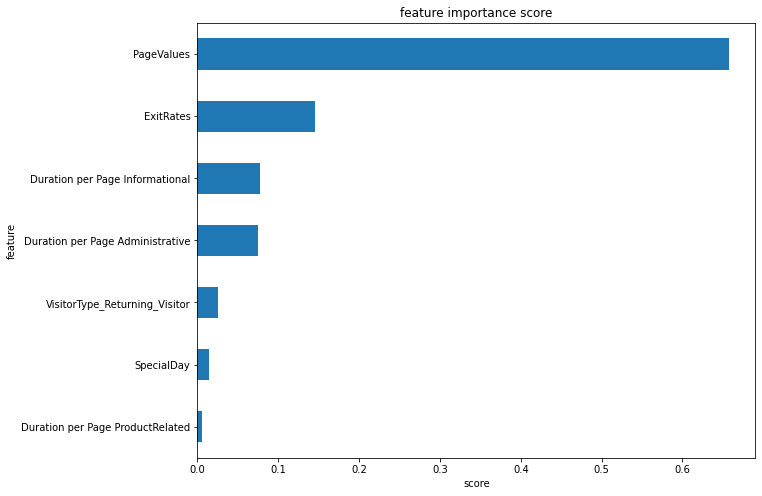

In [ ]:
show_feature_importance(rs.best_estimator_)

param value: 125; train: 0.9087610100780495; test: 0.8945546323595105
param value: 130; train: 0.9097388690908654; test: 0.8957375262734698
param value: 135; train: 0.910595974598707; test: 0.8962012794650792
param value: 141; train: 0.9105669790172845; test: 0.8953448936600413
param value: 146; train: 0.9113505191469752; test: 0.8968219681473852
param value: 151; train: 0.9099680796468862; test: 0.8951471079198935
param value: 157; train: 0.9098196688180936; test: 0.8956499480408338
param value: 162; train: 0.9083462471959625; test: 0.8932065741276268
param value: 167; train: 0.909104127690722; test: 0.8930308298889813
param value: 173; train: 0.9071840383494202; test: 0.8925559090032774
param value: 178; train: 0.9090311829537789; test: 0.8946954040824387
param value: 183; train: 0.9109956869315071; test: 0.8975137774078723
param value: 189; train: 0.9097418753217152; test: 0.8949372728255912
param value: 194; train: 0.9108042191189301; test: 0.8969236529409829
param value: 200; trai

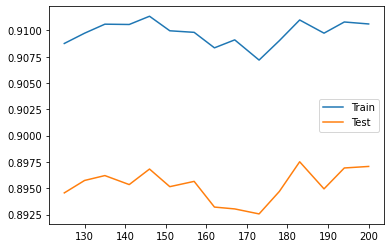

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(125, 200, 15)] # n_estimators

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators = c, max_depth=3)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

## AdaBoost

In [ ]:
# Fit Model Adabost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.80
Recall (Test Set): 0.76
Recall (Train Set): 0.80
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9211017190847766
roc_auc (crossval test): 0.9134578780351921


In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ada = AdaBoostClassifier(random_state=42)
ada_tuned = RandomizedSearchCV(ada, hyperparameters, random_state=42, cv=5, scoring='recall')
ada_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ada_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.54
Precision (Train Set): 0.78
Recall (Test Set): 0.81
Recall (Train Set): 0.81
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8908884396783057
roc_auc (crossval test): 0.8883003395071383


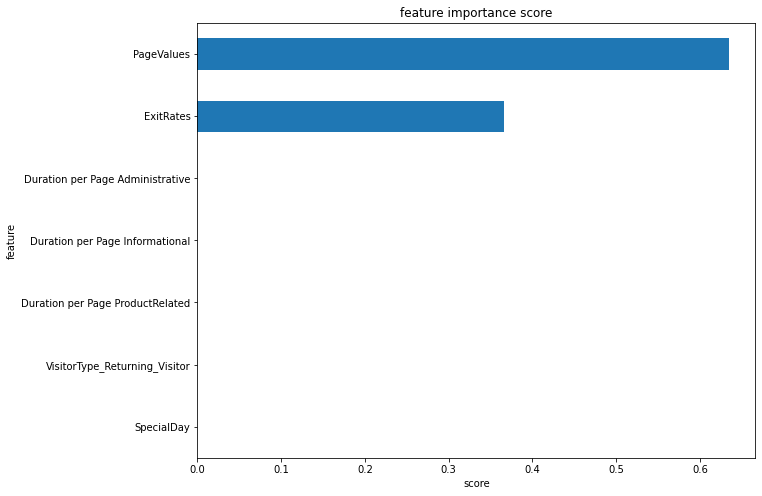

In [ ]:
show_feature_importance(ada_tuned.best_estimator_)

## XgBoost

In [ ]:
# Fit Model XgBoost

from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.56
Precision (Train Set): 0.82
Recall (Test Set): 0.77
Recall (Train Set): 0.83
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9355801679538545
roc_auc (crossval test): 0.9230180435770354


In [ ]:
# Hiperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.99
Precision (Test Set): 0.58
Precision (Train Set): 1.00
Recall (Test Set): 0.66
Recall (Train Set): 0.98
F1-Score (Test Set): 0.61
F1-Score (Test Set): 0.99
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9988819023387032
roc_auc (crossval test): 0.9475728219334482


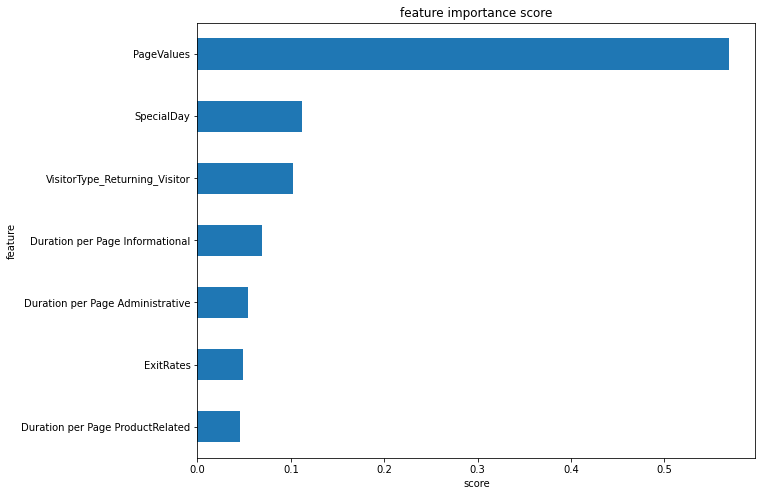

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

## Shap Value Model Random Forest

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.0 MB/s 


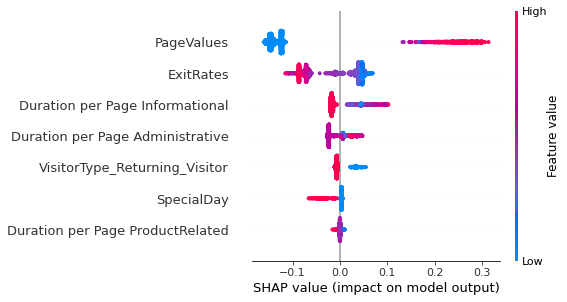

In [ ]:
import shap

model = RandomForestClassifier(n_estimators=125, max_depth=3)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive


## Confussion Matrix Model Random Forest

In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [int(x) for x in np.linspace(125, 200, 15)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.arange(3, 5)]
min_samples_split = [int(x) for x in np.linspace(1000, 1200 ,20)]
min_samples_leaf = [int(x) for x in np.linspace(200, 300, 20)] # min_samples_leaf
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring = 'roc_auc')
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.55
Precision (Train Set): 0.79
Recall (Test Set): 0.79
Recall (Train Set): 0.80
F1-Score (Test Set): 0.65
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9080763966383476
roc_auc (crossval test): 0.9053253993125139


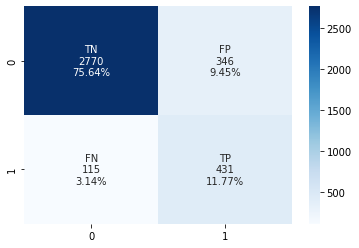

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = rs.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

# display matrix
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')